In [1]:
import sys
sys.path.append("..")
import numpy as np
import json
import matplotlib
import matplotlib.pyplot as plt
plt.ion()
%matplotlib inline
from cavsim2d.cavity import Cavity, Cavities, OperationPoints, Pillbox
import pprint
pp = pprint.PrettyPrinter(indent=4)

Project D:\Dropbox\CavityDesignHub\MuCol_Study\SimulationData\ConsoleTest created successfully/already exists.


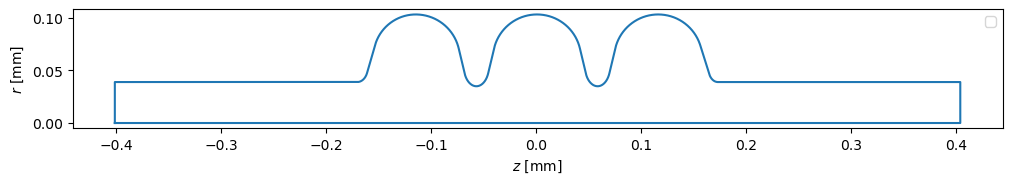

In [2]:
cavs = Cavities([])
# must first save cavities
cavs.save('D:\Dropbox\CavityDesignHub\MuCol_Study\SimulationData\ConsoleTest')

# define geometry parameters
midcell = np.array([42, 42, 12, 19, 35, 57.7, 100])
endcell_l = np.array([40.34, 40.34, 10, 13.5, 39, 55.716, 103.353])
endcell_r = np.array([42, 42, 9, 12.8, 39, 56.815, 103.353])
# create cavity
cav0 = Cavity(3, midcell, endcell_l, endcell_r, beampipe='both')
ax = cav0.plot('geometry')

# add cavity to cavities
cavs.add_cavity(cav0, 'tesla')

In [3]:
# run sweep
sweep_config = {
    'A': [30, 40, 5]
}

cavs.sweep(sweep_config)

Done with Cavity tesla. Time: 10.37233591079712
Done with Cavity tesla. Time: 10.176989316940308
Done with Cavity tesla. Time: 9.781516313552856
Done with Cavity tesla. Time: 9.55491828918457
Done with Cavity tesla. Time: 9.260538578033447


In [4]:
import pandas as pd
cavs.sweep_results['tesla']
sr = pd.DataFrame.from_dict(cavs.sweep_results['tesla']['A']).T

<Axes: >

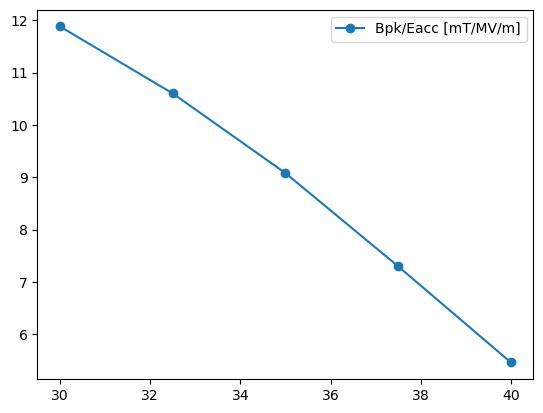

In [5]:
sr[['Bpk/Eacc [mT/MV/m]']].plot(marker='o')

In [6]:
help(cavs.run_eigenmode)

Help on method run_eigenmode in module cavsim2d.cavity:

run_eigenmode(eigenmode_config=None) method of cavsim2d.cavity.Cavities instance
    Runs the eigenmode analysis with the given configuration.
    
    Parameters
    ----------
    eigenmode_config : dict
        Configuration for running the eigenmode analysis. Example structure:
    
        .. code-block:: python
    
            eigenmode_config = {
                'processes': 3,
                'rerun': True,
                'boundary_conditions': 'mm',
                'uq_config': {
                    'variables': ['A', 'B', 'a', 'b'],
                    # 'objectives': ["freq [MHz]", "R/Q [Ohm]", "Epk/Eacc []", "Bpk/Eacc [mT/MV/m]", "G [Ohm]", "kcc [%]", "ff [%]"],
                    'objectives': ["Epk/Eacc []", "Bpk/Eacc [mT/MV/m]", "R/Q [Ohm]", "G [Ohm]"],
                    # 'objectives': ["ZL"],
                    'delta': [0.05, 0.05, 0.05, 0.05],
                    'processes': 4,
                    'distr